In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing required packages!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import shutil

import imageio
import skimage.io
import skimage.transform
import itertools

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.metrics import binary_accuracy 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


Arranging and Labeling the data!

In [ ]:
#Giving input shape
image_size = 128

input_shape = (image_size,image_size,3)


#Displaying no of chest x-ray images in each folder
print(len(os.listdir("drive/My Drive/Pneumonia/Input/Bacterial")))
print(len(os.listdir("drive/My Drive/Pneumonia/Input/Normal")))
print(len(os.listdir("drive/My Drive/Pneumonia/Input/Virus")))

2774
1575
1489


In [ ]:
#Creating dataframes
bacterial = os.listdir("drive/My Drive/Pneumonia/Input/Bacterial")
normal = os.listdir("drive/My Drive/Pneumonia/Input/Normal")
virus = os.listdir("drive/My Drive/Pneumonia/Input/Virus")

In [ ]:
import random
new_bacterial = []
new_virus = []
new_normal =[]

new_bacterial = random.sample(bacterial,1000)
new_normal = random.sample(normal,1000)
new_virus = random.sample(virus,1000)

print(new_bacterial)
print(new_normal)
print(new_virus)

['person1436_bacteria_3712.jpeg', 'person579_bacteria_2384.jpeg', 'person433_bacteria_1875.jpeg', 'person109_bacteria_517.jpeg', 'person362_bacteria_1652.jpeg', 'person962_bacteria_2887.jpeg', 'person472_bacteria_2007.jpeg', 'person1308_bacteria_3280.jpeg', 'person652_bacteria_2544.jpeg', 'person1745_bacteria_4584.jpeg', 'person275_bacteria_1291.jpeg', 'person684_bacteria_2580.jpeg', 'person1453_bacteria_3772.jpeg', 'person1921_bacteria_4828.jpeg', 'person1312_bacteria_3316.jpeg', 'person1663_bacteria_4412.jpeg', 'person623_bacteria_2495.jpeg', 'person387_bacteria_1769.jpeg', 'person1275_bacteria_3237.jpeg', 'person53_bacteria_255.jpeg', 'person109_bacteria_513.jpeg', 'person551_bacteria_2311.jpeg', 'person1677_bacteria_4443.jpeg', 'person760_bacteria_2664.jpeg', 'person427_bacteria_1867.jpeg', 'person771_bacteria_2675.jpeg', 'person1615_bacteria_4249.jpeg', 'person1085_bacteria_3025.jpeg', 'person994_bacteria_2922.jpeg', 'person475_bacteria_2020.jpeg', 'person604_bacteria_2463.jpeg', 

In [ ]:
df_bacterial = pd.DataFrame(new_bacterial, columns=['image_id'])
df_normal = pd.DataFrame(new_normal, columns=['image_id'])
df_virus = pd.DataFrame(new_virus, columns=['image_id'])

#resetting index value

df_bacterial.reset_index(inplace = True, drop = True)
df_normal.reset_index(inplace = True, drop = True)
df_virus.reset_index(inplace = True, drop = True)

print(df_bacterial.shape)
print(df_normal.shape)
print(df_virus.shape)

(1000, 1)
(1000, 1)
(1000, 1)


In [ ]:
df_bacterial.head()

,image_id
0,person1436_bacteria_3712.jpeg
1,person579_bacteria_2384.jpeg
2,person433_bacteria_1875.jpeg
3,person109_bacteria_517.jpeg
4,person362_bacteria_1652.jpeg


In [ ]:
df_normal.head()

,image_id
0,NORMAL2-IM-0705-0001.jpeg
1,IM-0256-0001.jpeg
2,IM-0555-0001-0002.jpeg
3,NORMAL2-IM-0507-0001.jpeg
4,IM-0273-0001.jpeg


In [ ]:
df_virus.head()

,image_id
0,person378_virus_761.jpeg
1,person722_virus_1341.jpeg
2,person1527_virus_2661.jpeg
3,person1580_virus_2739.jpeg
4,person607_virus_1173.jpeg


In [ ]:
#labeling the data

for i in bacterial:
  df_bacterial['target'] = 'bacterial'

df_bacterial['target'].value_counts()

bacterial    1000
Name: target, dtype: int64

In [ ]:
for i in normal:
  df_normal['target'] = 'normal'

df_normal['target'].value_counts()

normal    1000
Name: target, dtype: int64

In [ ]:
for i in virus:
  df_virus['target'] = 'virus'

df_virus['target'].value_counts()

virus    1000
Name: target, dtype: int64

In [ ]:
#shuffling the dataset

df_data = pd.concat([df_bacterial, df_normal, df_virus], axis=0).reset_index(drop=True)

df_data = shuffle(df_data)
df_data.shape

(3000, 2)

In [ ]:
df_data.head(10)

,image_id,target
389,person541_bacteria_2274.jpeg,bacterial
798,person1628_bacteria_4297.jpeg,bacterial
635,person440_bacteria_1897.jpeg,bacterial
1210,IM-0619-0001.jpeg,normal
2170,person1156_virus_1935.jpeg,virus
1911,NORMAL2-IM-0285-0001.jpeg,normal
569,person24_bacteria_111.jpeg,bacterial
2247,person748_virus_1373.jpeg,virus
2360,person1175_virus_1981.jpeg,virus
562,person61_bacteria_295.jpeg,bacterial


In [ ]:
#spliting the dataset
df_train, df_val = train_test_split(df_data, test_size=0.20, random_state=101)

print(df_train.shape)
print(df_val.shape)

(2400, 2)
(600, 2)


In [ ]:
df_train['target'].value_counts()

normal       816
bacterial    796
virus        788
Name: target, dtype: int64

In [ ]:
df_val['target'].value_counts()

virus        212
bacterial    204
normal       184
Name: target, dtype: int64

In [ ]:
classes = np.unique(df_train['target'])
print(classes)

['bacterial' 'normal' 'virus']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


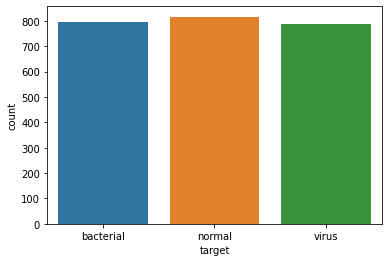

In [ ]:
import seaborn as sns
sns.countplot(df_train['target'])

In [ ]:
base_dir = 'drive/My Drive/Pneumonia/base_dir'

directory = os.path.exists(base_dir)

if directory == True:
  shutil.rmtree(base_dir)

os.mkdir(base_dir)

In [ ]:
# train_di
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
Bacterial = os.path.join(train_dir, 'bacterial')
os.mkdir(Bacterial)
Normal = os.path.join(train_dir, 'normal')
os.mkdir(Normal)
Virus = os.path.join(train_dir, 'virus')
os.mkdir(Virus)


# create new folders inside val_dir
Bacterial = os.path.join(val_dir, 'bacterial')
os.mkdir(Bacterial)
Normal = os.path.join(val_dir, 'normal')
os.mkdir(Normal)
Virus = os.path.join(val_dir, 'virus')
os.mkdir(Virus)

In [ ]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [ ]:

# Get a list of images in each of the two folders
folder_1 = os.listdir('drive/My Drive/Pneumonia/Input/Bacterial')
folder_2 = os.listdir('drive/My Drive/Pneumonia/Input/Normal')
folder_3 = os.listdir('drive/My Drive/Pneumonia/Input/Virus')
  
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
  fname = image
  label = df_data.loc[image,'target']

  if fname in folder_1:
    # source path to image
    src = os.path.join('drive/My Drive/Pneumonia/Input/Bacterial', fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    
    image = cv2.imread(src)
    image = cv2.resize(image, (image_size, image_size))
    # save the image at the destination
    cv2.imwrite(dst, image)
    #shutil.copyfile(src, dst)

  if fname in folder_2:
    # source path to image
    src = os.path.join('drive/My Drive/Pneumonia/Input/Normal', fname)
     # destination path to image
    dst = os.path.join(train_dir, label, fname)
    
    image = cv2.imread(src)
    image = cv2.resize(image, (image_size, image_size))
    # save the image at the destination
    cv2.imwrite(dst, image)
    #shutil.copyfile(src, dst)

  if fname in folder_3:
    # source path to image
    src = os.path.join('drive/My Drive/Pneumonia/Input/Virus', fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
          
    image = cv2.imread(src)
    image = cv2.resize(image, (image_size, image_size))
    # save the image at the destination
    cv2.imwrite(dst, image)
    #shutil.copyfile(src, dst)

In [ ]:
# Transfer the val images

for image in val_list:
  fname = image
  label = df_data.loc[image,'target']
  
  if fname in folder_1:
    # source path to image
    src = os.path.join('drive/My Drive/Pneumonia/Input/Bacterial', fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
          
    image = cv2.imread(src)
    image = cv2.resize(image, (image_size, image_size))
    # save the image at the destination
    cv2.imwrite(dst, image)
    # copy the image from the source to the destination
    #shutil.copyfile(src, dst)

  if fname in folder_2:
    # source path to image
    src = os.path.join('drive/My Drive/Pneumonia/Input/Normal', fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
          
    image = cv2.imread(src)
    image = cv2.resize(image, (image_size, image_size))
    # save the image at the destination
    cv2.imwrite(dst, image)
    # copy the image from the source to the destination
    #shutil.copyfile(src, dst)
          
  if fname in folder_3:
    # source path to image
    src = os.path.join('drive/My Drive/Pneumonia/Input/Virus', fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
          
    image = cv2.imread(src)
    image = cv2.resize(image, (image_size, image_size))
    # save the image at the destination
    cv2.imwrite(dst, image)
          
    # copy the image from the source to the destination
    #shutil.copyfile(src, dst)

In [ ]:
print(len(os.listdir('drive/My Drive/Pneumonia/base_dir/train_dir/bacterial')))
print(len(os.listdir('drive/My Drive/Pneumonia/base_dir/train_dir/normal')))
print(len(os.listdir('drive/My Drive/Pneumonia/base_dir/train_dir/virus')))

796
816
788


In [ ]:
train_path = 'drive/My Drive/Pneumonia/base_dir/train_dir'
val_path = 'drive/My Drive/Pneumonia/base_dir/val_dir/'


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 15, horizontal_flip=True)

train_gen = train_datagen.flow_from_directory(train_path, target_size=(image_size,image_size), batch_size=train_batch_size, class_mode='categorical')

val_gen = datagen.flow_from_directory(val_path, target_size=(image_size,image_size), batch_size=val_batch_size, class_mode='categorical')

test_gen = datagen.flow_from_directory(val_path, target_size=(image_size,image_size), batch_size=val_batch_size, class_mode='categorical', shuffle=False)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
fname = 'drive/My Drive/Pneumonia/model.h5'

model = load_model(fname)
model.load_weights(fname)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        3

In [ ]:
#Freezing the earlier layers
for layer in model.layers[:-15]:
  layer.trainable = False

for layer in model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d18619e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d1800320> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d1369828> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe6d137e780> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7fe6d1384748> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d1384b38> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d1339898> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d13437f0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe6d1349748> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fe6d1352710> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d1352828> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6d12e2978> True
<ten

In [ ]:
weights, biases = model.layers[0].get_weights()
print(weights, biases)

[[[[ 8.85768980e-02  7.15445727e-02  7.45998174e-02  1.09410644e-01
     6.46075383e-02 -1.28571838e-01  2.32513510e-02  8.01459607e-03
     2.60283332e-02  8.92208889e-02 -8.23881328e-02  4.81420867e-02
    -4.31166999e-02  7.58709982e-02 -9.56182927e-02 -1.36778116e-01
     2.65807821e-03 -8.46255794e-02  6.75844252e-02  8.03321898e-02
     5.63703105e-02 -1.25361621e-01 -7.43518723e-03  1.31886080e-02
     8.63097534e-02  7.26510212e-02  4.35450077e-02  7.22702444e-02
    -8.44160765e-02  1.20470442e-01 -2.09265836e-02  4.90389280e-02]
   [ 6.16151206e-02  1.18864961e-01  7.45428503e-02 -1.28450572e-01
     9.42572057e-02  2.71482151e-02  6.56917766e-02  1.35505691e-01
    -1.19071543e-01  6.24837466e-02 -5.04926592e-02 -6.96774349e-02
    -2.78824437e-02  1.10032531e-02 -1.21490046e-01  1.29238635e-01
     7.83921685e-03 -6.21896535e-02 -1.01775609e-01  3.31031764e-03
     6.56944215e-02  1.04838662e-01  7.84806982e-02  7.49501139e-02
    -6.37064949e-02 -8.80592167e-02 -9.96343493

In [ ]:
for i in range(0,3):
  model.pop()#removing the last layer from pre trained model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        3

In [ ]:
num_classes = len(classes)

model.add(Dense(64, activation = 'relu', name = 'dense_1'))
model.add(Dropout(0.3, name='dropout_4'))
model.add(Dense(64, activation = 'relu', name = 'dense_2'))
model.add(Dropout(0.3, name='dropout_5'))
model.add(Dense(num_classes, activation = 'softmax', name = 'Final_layer')) # Adding new final layer for classification

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        3

Training a Fine Tuned Model

In [ ]:
Adm = Adam(learning_rate=0.0001)
model.compile(optimizer=Adm, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time
print (time.strftime("%H:%M:%S"))

21:18:15


In [ ]:
filepath = "model_fineTuned.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1, mode='max', min_lr=0.00001)

early_stop = EarlyStopping(monitor='val_accuracy', patience=15, mode = 'auto')

callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, validation_data=val_gen, 
                              validation_steps=val_steps, epochs=100, verbose=1,
                              callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.9707 - accuracy: 0.5292
Epoch 00001: val_accuracy improved from -inf to 0.66833, saving model to model_fineTuned.h5
240/240 [==============================] - 16s 66ms/step - loss: 0.9707 - accuracy: 0.5292 - val_loss: 0.8030 - val_accuracy: 0.6683 - lr: 1.0000e-04
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.7808 - accuracy: 0.6567
Epoch 00002: val_accuracy improved from 0.66833 to 0.71167, saving model to model_fineTuned.h5
240/240 [==============================] - 15s 62ms/step - loss: 0.7808 - accuracy: 0.6567 - val_loss: 0.6336 - val_accuracy: 0.7117 - lr: 1.0000e-04
Epoch 3/100
240/240 [==============================] - ETA: 0s - loss: 0.7064 - accuracy: 0.6900
Epoch 00003: val_accuracy improved from 0.71167 to 0.72833, saving model to model_fineTuned.h5
240/240 [==============================] - 15s 61ms

In [ ]:
print (time.strftime("%H:%M:%S"))

21:41:30


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.load_weights('model_fineTuned.h5')

val_loss, val_acc =\
 model.evaluate_generator(test_gen, steps=val_steps)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
val_loss: 0.44275376200675964
val_acc: 0.8149999976158142


In [ ]:
predictions = model.predict_generator(test_gen, steps=val_steps, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
60/60 [==============================] - 1s 19ms/step


<Figure size 432x288 with 0 Axes>

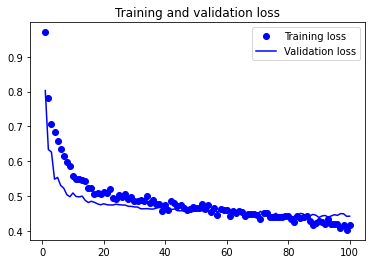

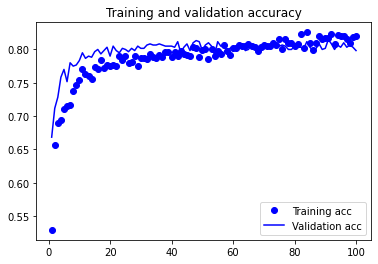

<Figure size 432x288 with 0 Axes>

In [ ]:
# display the loss and accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
predictions.shape

(600, 3)

In [ ]:
#Create Confusion matrix
test_labels = test_gen.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [ ]:
test_labels.shape

(600,)

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_gen.class_indices

{'bacterial': 0, 'normal': 1, 'virus': 2}

Confusion matrix, without normalization
[[164   3  37]
 [  3 172   9]
 [ 51   8 153]]


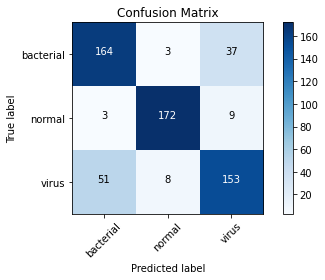

In [ ]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['bacterial', 'normal', 'virus']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification Report

test_filenames = test_gen.filenames

# Get the true labels
y_true = test_gen.classes

# Get the predicted labels
y_pred = predictions.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report

report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

   bacterial       0.75      0.80      0.78       204
      normal       0.94      0.93      0.94       184
       virus       0.77      0.72      0.74       212

    accuracy                           0.81       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.81      0.81       600



In [ ]:
weights, biases = model.layers[-1].get_weights()
print(weights,biases)


[[-0.09636927  0.14443508  0.23239681]
 [-0.23054488 -0.325064   -0.16952433]
 [ 0.28332427 -0.25169864 -0.00236921]
 [ 0.2017562  -0.23585676  0.10728589]
 [-0.27961108  0.18710798 -0.17391449]
 [ 0.24305402  0.09550725 -0.06414622]
 [-0.26842448  0.2519738  -0.01352941]
 [-0.2725102  -0.1002657  -0.07014458]
 [-0.18204328 -0.34762058  0.02119908]
 [ 0.04456114 -0.2598953  -0.13463622]
 [ 0.06996313 -0.32595247 -0.18074116]
 [-0.11817537  0.27188385  0.1320585 ]
 [ 0.2567122  -0.1586992  -0.24666916]
 [-0.0721876   0.01529154  0.01363771]
 [-0.21863882  0.00478839 -0.19622171]
 [-0.01860607  0.13908118 -0.09228585]
 [ 0.05975516  0.06318842  0.19795671]
 [ 0.18114512 -0.10111768  0.1627724 ]
 [ 0.18383981 -0.16775656  0.309964  ]
 [-0.21757643 -0.3170193   0.21191303]
 [ 0.03127244  0.24231765  0.1075568 ]
 [-0.19445348 -0.08028101  0.0399483 ]
 [ 0.20439348 -0.33094722  0.07394861]
 [-0.10276745  0.2775592   0.1627829 ]
 [ 0.05832571 -0.00445019 -0.13500889]
 [-0.12690677  0.01776063

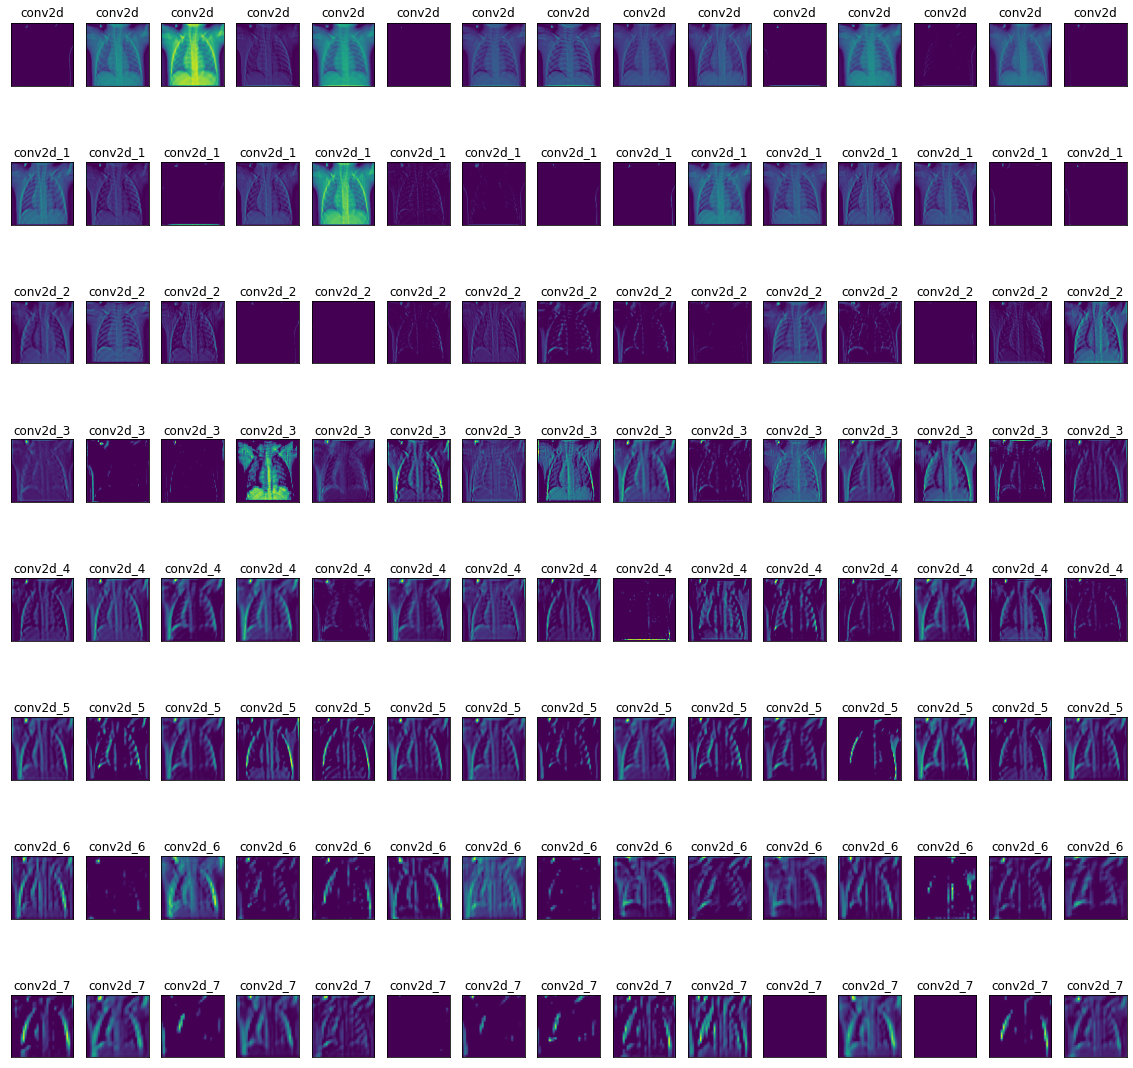

In [ ]:
layer_names = ['conv2d','conv2d_1','conv2d_2','conv2d_3','conv2d_4','conv2d_5','conv2d_6','conv2d_7']
outputs = []
image = image.reshape((1, 128, 128, 3))
#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
#plotting the outputs
fig,ax = plt.subplots(nrows=8,ncols=15,figsize=(20,20))

for i in range(8):
    for z in range(15):
        ax[i][z].imshow(outputs[i][0,:,:,z])
        ax[i][z].set_title(layer_names[i])
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])
        ax[i][z].set_yticks([])
        ax[i][z].set_yticks([])
        ax[i][z].set_yticks([])
        ax[i][z].set_yticks([])

plt.savefig('layerwise_output.jpg')

Image ---------->drive/My Drive/Pneumonia/Input/Normal/IM-0405-0001.jpeg
normal (1.0)
virus (1.78e-05)
bacterial (3.87e-06)


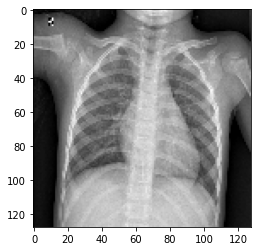

In [ ]:
from keras.preprocessing import image
directory = os.listdir('drive/My Drive/Pneumonia/Input/')
classes = ['bacterial' ,'normal' ,'virus']

def get_random_img():
  file = []
  for i in directory:
    x = os.path.join('drive/My Drive/Pneumonia/Input/', i)
    for j in os.listdir(x):
      file.append(os.path.join(x,j))
            
  input_img = ''.join(random.sample(file,1))
  return input_img


input_img = get_random_img()
print('Image ---------->'+ input_img)

img = image.load_img(input_img, target_size = (128,128))
img = image.img_to_array(img)
img = img/255


proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]

for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)